In [21]:
import pandas as pd
import os
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt

In [22]:
### Get feature summary dataframe
dir_in_res = '../out/20.0216 feat/reg_rf_boruta'
dir_in_anlyz = os.path.join(dir_in_res, 'anlyz_filtered')
df_featSummary = pd.read_csv(os.path.join(dir_in_anlyz, 'feat_summary.csv')) #feature summary
df_featSummary['feat_sources'] = df_featSummary['feat_sources'].apply(literal_eval)
df_featSummary['feat_genes'] = df_featSummary['feat_genes'].apply(literal_eval)

In [23]:
### Get feature source and feature gene dataframe
# Feature source
df_source = df_featSummary.loc[:,df_featSummary.columns.str.contains(r'feat_source\d')]
df_source.replace({'CERES':0, 'RNA-seq':1, 'CN':2, 'Mut':3, np.nan:-1}, inplace=True)
df_source.columns = range(1,11)

# Feature gene
df_gene = df_featSummary.loc[:,df_featSummary.columns.str.contains(r'feat_gene\d')]
df_gene.columns = range(1,11)

/Users/stella/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [24]:
### Count features and unique genes
list_fc = []
list_gc = []

# Append all feature and gene counts
list_fc.append(sum(df_source[df_source!=-1].count()))
list_gc.append(pd.melt(df_gene)['value'].nunique())

# Append specific feature and gene counts
for i in range(0,4):
    fc = sum(df_source[df_source==i].count())
    gc = pd.melt(df_gene[df_source==i])['value'].nunique()
    list_fc.append(fc)
    list_gc.append(gc)
    
# Calculate redundancy
list_red = [round(j/i,3) for i, j in zip(list_gc, list_fc)]
list_unq = [round(i/j,3) for i, j in zip(list_gc, list_fc)]

In [25]:
sum(df_source[df_source!=-1].count())

3305

In [26]:
# Redundancy dataframe
data = {'Feature': ['All', 'CERES', 'RNA-seq', 'CN', 'MUT'],
        'Uniq_gene_count': list_gc,
       'Feature_count': list_fc,
        'Uniqueness_score': list_unq,
       'Redundancy_score': list_red}
df_red = pd.DataFrame(data)

# Show datafrem
df_red

,Feature,Uniq_gene_count,Feature_count,Uniqueness_score,Redundancy_score
0,All,1790,3305,0.542,1.846
1,CERES,1044,2426,0.430,2.324
2,RNA-seq,628,723,0.869,1.151
3,CN,150,150,1.000,1.000
4,MUT,4,6,0.667,1.500


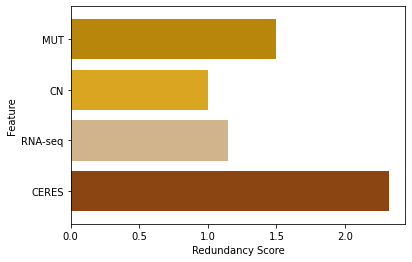

In [27]:
# Plot redundancy score - features
color_list = ['saddlebrown', 'tan', 'goldenrod', 'darkgoldenrod']
ax = df_red.iloc[1:5,:].plot.barh(x="Feature", y="Redundancy_score", width = 0.8, color = color_list, legend = None)
ax.set_xlabel('Redundancy Score')
plt.show()